In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from numpy import argmax
from sklearn.metrics import f1_score
import seaborn as sns

In [83]:
load_digits().keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [84]:
print(load_digits()['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [85]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

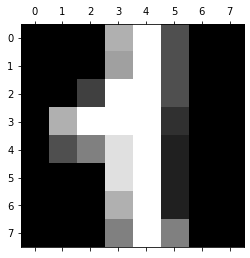

In [86]:
plt.gray()
plt.matshow(digits.images[93]) 
plt.show() 

In [87]:
print(digits.data.shape)
print(digits.target.shape)
print(digits.target_names.shape)
print(digits.images.shape)

(1797, 64)
(1797,)
(10,)
(1797, 8, 8)


In [88]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [89]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1347, 64)
(1347,)
(450, 64)
(450,)


In [90]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_test /= 255
print(x_train.shape)
print(x_test.shape)

(1347, 64)
(450, 64)


In [91]:
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(1347, 10)
(450, 10)


In [154]:
test_model = Sequential([
    Dense(128, input_shape = (64,)),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dropout(0.5),
    Dense(32),
    Activation('relu'),
    Dropout(0.3),
    Dense(10),
    Activation('softmax'),
])
test_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 128)               8320      
_________________________________________________________________
activation_63 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_64 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 32)                2080      
_________________________________________________________________
activation_65 (Activation)   (None, 32)              

In [155]:
test_model.compile(optimizer = 'adam',
             loss = "categorical_crossentropy",
             metrics = ['mae', 'accuracy'])

In [156]:
h = test_model.fit(x_train, y_train, epochs = 30, batch_size = 32, validation_data = (x_test, y_test))

Train on 1347 samples, validate on 450 samples
Epoch 1/30
1347/1347 [==============================] - 0s 234us/step - loss: 2.2865 - mae: 0.1797 - accuracy: 0.1292 - val_loss: 2.2534 - val_mae: 0.1790 - val_accuracy: 0.1978
Epoch 2/30
1347/1347 [==============================] - 0s 63us/step - loss: 2.2060 - mae: 0.1778 - accuracy: 0.2205 - val_loss: 2.0834 - val_mae: 0.1748 - val_accuracy: 0.3867
Epoch 3/30
1347/1347 [==============================] - 0s 75us/step - loss: 1.9873 - mae: 0.1709 - accuracy: 0.3059 - val_loss: 1.7016 - val_mae: 0.1614 - val_accuracy: 0.5378
Epoch 4/30
1347/1347 [==============================] - 0s 87us/step - loss: 1.6931 - mae: 0.1576 - accuracy: 0.4091 - val_loss: 1.3548 - val_mae: 0.1430 - val_accuracy: 0.6911
Epoch 5/30
1347/1347 [==============================] - 0s 59us/step - loss: 1.4407 - mae: 0.1418 - accuracy: 0.4811 - val_loss: 1.0826 - val_mae: 0.1245 - val_accuracy: 0.7778
Epoch 6/30
1347/1347 [==============================] - 0s 82us/ste

In [157]:
accuracy = test_model.evaluate(x_test, y_test)

450/450 [==============================] - 0s 37us/step


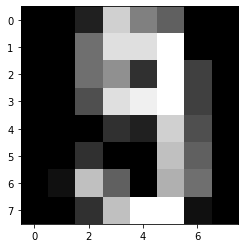

In [158]:
plt.imshow(x_test[23].reshape(8,8))

In [159]:
x_test[0].shape

(64,)

In [160]:
pred = test_model.predict(x_test[index].reshape(1, 64))

In [161]:
y_pred = []
for index in range (450):
    pred = test_model.predict(x_test[index].reshape(1, 64))
    y_pred.append(pred.argmax())

In [162]:
y_pred = to_categorical(y_pred, 10)

In [163]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [164]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [165]:
cm

array([[47,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  1,  1,  0,  3],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 44,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  6,  2,  1,  0,  1,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 32]])

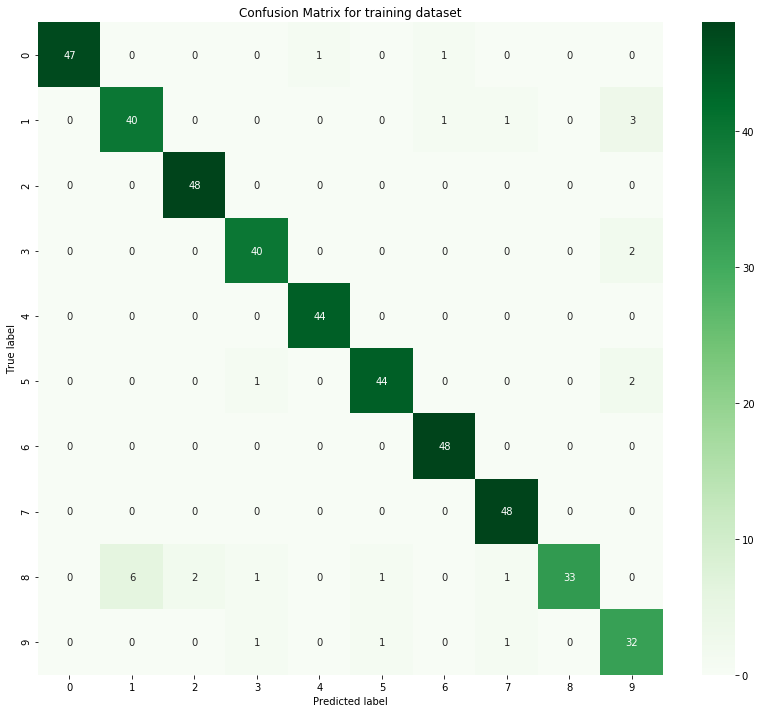

In [166]:
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [167]:
print(f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro'))
print(f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='micro'))
print(f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted'))

0.9385352985633466
0.9422222222222222
0.9413746246787804


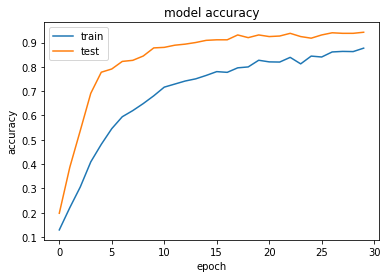

In [169]:
##ACCURACY GRAPH
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

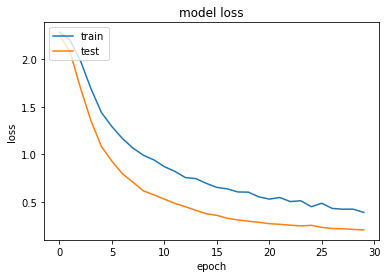

In [170]:
##LOSS GRAPH
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

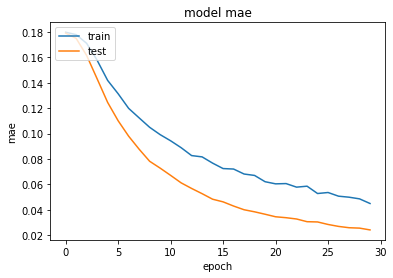

In [171]:
##LOSS GRAPH
plt.plot(h.history['mae'])
plt.plot(h.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()